**UNIVERSIDADE DE SÃO PAULO (USP)**

**_Author_**: Carlos Filipe de Castro Lemos

**_Academic Study_**: Continuous - Normal Distribution

In [1]:
import random
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.integrate import quad

# Normal Distribution (Gaussian Distribution)

The normal distribution is one of the most important distributions in statistics, being widely used in biological and social areas. This fact is related to the central limit theorem, which defines that, under certain circumstances, the average of several samples of a random variable (observations) converges to a normal distribution as the number of samples increases. The same happens with many other methods, such as propagation of uncertainty and the least squares parameter. If a random variable is gaussian type, it's called normally distributed.

## General Probability Density Distribution (PDF)

$$\Phi(x) = \frac{1}{\sigma\sqrt{2\pi}}\mathrm{e}^{-\frac{1}{2}\left( \frac{x-\mu}{\sigma} \right)^{2}}$$

Where:
* $\mu$: mean or expectation of the distribution. It's important to say taht it's value can be median and mode too (in a perfect distributiuon).
* $\sigma^{2}$: variance of distribution
* $\sigma$: standard deviation

> If mean is 0 and variance 1, we called this Standard Normal Distribution.

In [2]:
def pdf_normal(x, mi, sigma):
    return (1/(sigma*np.sqrt(2*np.pi)))*np.e**(((-1/2)*((x-mi)/sigma)**2))

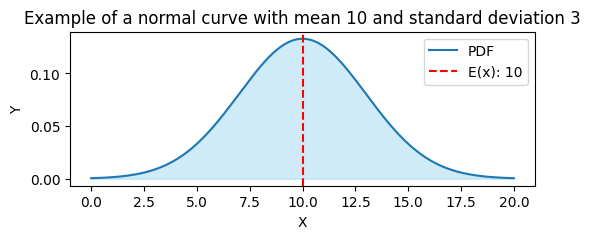

In [3]:
mi = 10
sigma = 3

x = np.linspace(0, 20, 1000)
y = np.array([pdf_normal(variable, mi, sigma) for variable in x])

# Criação do gráfico
plt.figure(figsize=(6,2))
plt.plot(x, y, label='PDF')
plt.axvline(x=mi, linestyle='--', color='red', label=f'E(x): {mi}')
plt.fill_between(x, y, color='skyblue', alpha=0.4)
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Example of a normal curve with mean {mi} and standard deviation {sigma}')
plt.legend()
plt.show()

## Cumulative Distribution Function

$$ \Phi(x) = \int_{-\infty}^{x}\Phi(t)\mathrm{d}t$$

In [4]:
def cdf_normal(x):
    result, _ = quad(pdf_normal, -np.inf, x, (mi, sigma))
    return result

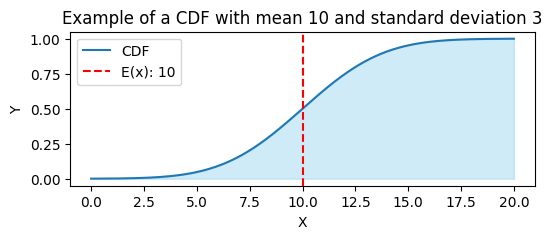

In [5]:
x = np.linspace(0, 20, 1000)
y = np.array([cdf_normal(variable) for variable in x])

# Criação do gráfico
plt.figure(figsize=(6,2))
plt.plot(x, y, label='CDF')
plt.axvline(x=mi, linestyle='--', color='red', label=f'E(x): {mi}')
plt.fill_between(x, y, color='skyblue', alpha=0.4)
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Example of a CDF with mean {mi} and standard deviation {sigma}')
plt.legend()
plt.show()

## Expectation (E(X))

The numerical calculation of the expectation of the normal distribution is equivalent to that of the uniform distribution. What changes is the internal function of the integral.

In [6]:
def pdf_normal_expectation(x, mi, sigma):
    return x*(1/(sigma*np.sqrt(2*np.pi)))*np.e**(((-1/2)*((x-mi)/sigma)**2))

In [7]:
integral, _ = quad(pdf_normal_expectation, -np.inf, np.inf, (mi, sigma))
print(f'Expectation: {integral:.3f}')

Expectation: 10.000


## Standard Deviation and Coverage

In practice, standard deviations are used to calculate probabilites of interest. For example, if we want to estimate the probability of a value being between 13 and 15, in a normal distribution with mean 10 and standard deviation 3, simply calculate its integral in this section, as follows:


In [12]:
result, _ = quad(pdf_normal, 13, 15, (mi, sigma))
print(f'Probability: {result:.4f}')

Probability: 0.1109


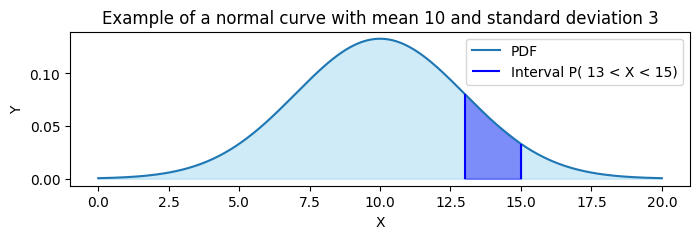

In [9]:
mi = 10
sigma = 3

x = np.linspace(0, 20, 1000)
y = np.array([pdf_normal(variable, mi, sigma) for variable in x])

# Criação do gráfico
plt.figure(figsize=(8,2))
plt.plot(x, y, label='PDF')
plt.vlines(x=13, ymin=0, ymax=pdf_normal(13, mi, sigma), color='blue', label='Interval P( 13 < X < 15)')
plt.vlines(x=15, ymin=0, ymax=pdf_normal(15, mi, sigma), color='blue')
plt.fill_between(x, y, color='skyblue', alpha=0.4)
plt.fill_between([13,14,15], [pdf_normal(variable, mi, sigma) for variable in [13,14,15]], color='blue', alpha=0.4)
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Example of a normal curve with mean {mi} and standard deviation {sigma}')
plt.legend()
plt.show()


Other example, if we select the distance of one standard deviation from the mean, we will obtain 68.26% coverage of the area under the normal curve. However, this same reasoning is applied for 2 and 3 standard deviations, which covers approximately 95.44 and 99.73%. These values ​​are important because the creation of confidence intervals and the resolution of Hypothesis Tests.

In [10]:
result1, _ = quad(pdf_normal, mi-sigma, mi+sigma, (mi, sigma))
result2, _ = quad(pdf_normal, mi-2*sigma, mi+2*sigma, (mi, sigma))
result3, _ = quad(pdf_normal, mi-3*sigma, mi+3*sigma, (mi, sigma))
print(result1, result2, result3)

0.682689492137086 0.9544997361036417 0.9973002039367399


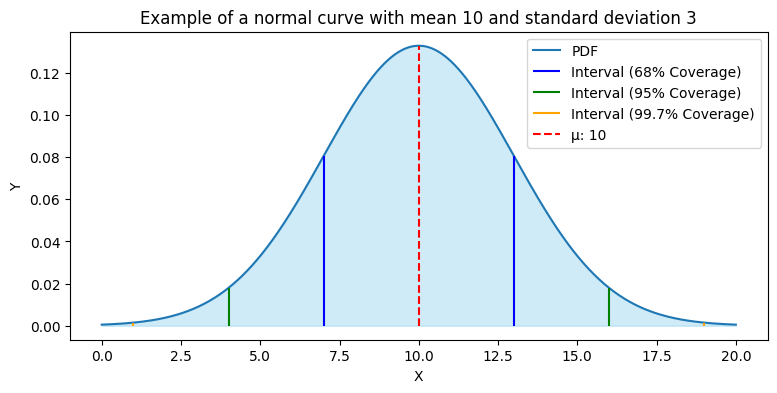

In [11]:
mi = 10
sigma = 3

x = np.linspace(0, 20, 1000)
y = np.array([pdf_normal(variable, mi, sigma) for variable in x])

# Criação do gráfico
plt.figure(figsize=(9,4))
plt.plot(x, y, label='PDF')
plt.vlines(x=mi-sigma,   ymin=0, ymax=pdf_normal(mi-sigma, mi, sigma), color='blue', label='Interval (68% Coverage)')
plt.vlines(x=mi+sigma,   ymin=0, ymax=pdf_normal(mi+sigma, mi, sigma), color='blue')
plt.vlines(x=mi-2*sigma, ymin=0, ymax=pdf_normal(mi-2*sigma, mi, sigma), color='green', label='Interval (95% Coverage)')
plt.vlines(x=mi+2*sigma, ymin=0, ymax=pdf_normal(mi+2*sigma, mi, sigma), color='green')
plt.vlines(x=mi-3*sigma, ymin=0, ymax=pdf_normal(mi-3*sigma, mi, sigma), color='orange', label='Interval (99.7% Coverage)')
plt.vlines(x=mi+3*sigma, ymin=0, ymax=pdf_normal(mi+3*sigma, mi, sigma), color='orange')
plt.vlines(x=mi,         ymin=0, ymax=pdf_normal(mi, mi, sigma), linestyle='--', color='red', label=f'μ: {mi}')
plt.fill_between(x, y, color='skyblue', alpha=0.4)
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Example of a normal curve with mean {mi} and standard deviation {sigma}')
plt.legend()
plt.show()